## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [6]:
df.query('group == "treatment"')

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


c. The number of unique users in the dataset.

In [7]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [8]:
df['converted'].sum()/df.shape[0]*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't match.

In [10]:
(df.query('group == "treatment" & landing_page == "old_page"')['user_id'].count()) + (df.query('group == "control" & landing_page == "new_page"')['user_id'].count())

3893

f. Do any of the rows have missing values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
# remove rows where landing_page and group columns dnt match by creating a new df with matching rows
#old_page and control match
df_old_page_control = df.query('group == "control" & landing_page == "old_page"')

# new_page and treatment match
df_new_page_treatment = df.query('group == "treatment" & landing_page == "new_page"')

# remove rows where landing_page and group columns don't match
df2 = df_new_page_treatment.append(df_old_page_control)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop(labels=1899, axis=0, inplace=True)

df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
converted_users2 = float(df2.query('converted == 1')['user_id'].nunique())
p2 = converted_users2/float(df2.shape[0])

p2

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
converted_controlusers2 = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_users2 =float(df2.query('group == "control"')['user_id'].nunique())
control_conversions = converted_controlusers2 /control_users2

control_conversions

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
converted_treatment = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treatement_2 =float(df2.query('group == "treatment"')['user_id'].nunique())
treatment_conversions = converted_treatment /treatement_2

treatment_conversions

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
new_page_user = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
probability_new_page = new_page_user/float(df2.shape[0])

probability_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [22]:
(control_conversions - treatment_conversions)*100

0.15782389853555567

The conversion rate for the control group was 12.04%, compared to 11.8% for the treatment group. Although the treatment group's conversion rate was slightly lower, at approximately 0.15%, the difference is not statistically significant. Therefore, we cannot conclude that the new treatment page results in a higher conversion rate than the control page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

  ######                                H0: **$p_{old}$**≥**$p_{new}$**
 
  ######                            H1: **$p_{old}$**<**$p_{new}$**
  
  
 The null hypothesis posits that there is no significant difference between the new page and the old page or even that     the new pay may perform worse than the old page. 
          
  The alternative hypothesis is that the new page performs better than the old page.
          
          
                                

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

𝑝𝑛𝑒𝑤  𝑝𝑜𝑙𝑑 

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2['converted'].mean()

p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


In [25]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df2.query('group == "treatment"')['user_id'].count()

n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query('group == "control"')['user_id'].count()

n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#random sampling of conversions using the size of the individuals in the treatment group 
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])  
new_page_converted.mean()      

0.8814672080379877

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
#random sampling of conversions using the size of the individuals in the control group 
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.881011054971984

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.0004561530660037727

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [31]:
p_diffs, new_means, old_means = [], [], []

for _ in range (10000):
    new = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
    old = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
    new_means.append(new.mean())
    old_means.append(old.mean())
    p_diffs.append(new.mean() - old.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

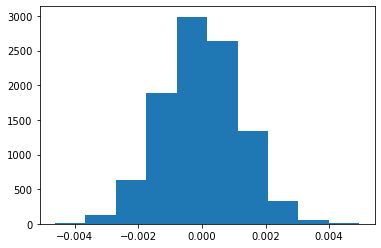

In [32]:
plt.hist(p_diffs) # Plot the null distribution
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

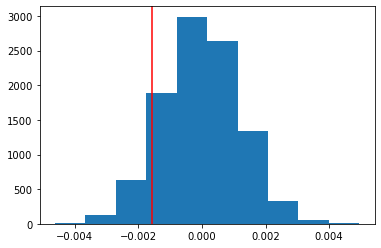

In [33]:
plt.hist(p_diffs)  
actual_diff = (df2.query('group == "treatment" & converted == 1').shape[0] / df2.query('group == "treatment"').shape[0]) - \
df2.query('group == "control" & converted == 1').shape[0] / df2.query('group == "control"').shape[0]
plt.axvline(x=actual_diff, color='red');  #Plot line for observed statistic with the null distibution
plt.show()

The null distribution's peak is centered at zero, and the observed difference in conversion rates is relatively small compared to the null distribution mean. Consequently, the null hypothesis remains statistically significant.

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [34]:
(np.array(p_diffs) > actual_diff).mean()

0.9013

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j, the p-value was calculated based on the conversion rate. The computed p-value exceeds the Type 1 Error Rate of 0.05, indicating that there is no statistical significance and providing evidence in favor of the null hypothesis. As a result, we cannot conclude that the new page converts more users than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1').shape[0] #number of conversions for each page
convert_new = df2.query('group == "treatment" & converted == 1').shape[0]
n_old = df2.shape[0] - df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

# z - score is the difference between the conversion rates and the null hypothesis which is 1.29 in this case
#https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest

(1.286299137965753, 0.19833868323460735)

In [37]:
from scipy.stats import norm
norm.cdf(z_score) # this tells us how significant our z-score is. close to 0 means it is close to the mean score

0.9008306583826964

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

According to the computed z-score and p-value, there is no significant difference in conversion rates between the old and new pages. Therefore, we fail to reject the null hypothesis. Additionally, the z-score is close to the null mean of 0. These results are consistent with those from parts j and k, which suggest that there is no evidence to support the assumption that the new page is better at converting users than the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression will be performed 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2['intercept'] = 1
df2[['ab_page', 'treatment']] = pd.get_dummies(df2['group'])

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary2() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-03-31 12:18 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

In [40]:
np.exp(0.0150)

1.015113064615719

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

According to the above model, the odds of a user being converted are 1.015 times higher than the odds of not being converted.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In logistic regression the null hypothesis, which is when all the coefficients in the regression equation take the value zero; and the alternative hypothesis is that the model with predictors currently under consideration is accurate and differs significantly from the null or zero.
 
In this logistic regression model the p-value is not less than .05, therefore we fail to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

When exploring other factors that may affect whether an individual converts, such as age, time of day, and weather, incorporating them into the regression model can provide valuable insights into their impact on the outcome of interest and identify possible confounding variables. However, adding too many variables may result in overfitting, reduce the model's generalizability, and make interpretation of the results more challenging. In addition, the presence of correlations between the independent variables may lead to multicollinearity, which can make it difficult to estimate the effects of individual variables. Therefore, it is important to thoughtfully choose which factors to incorporate into the model and to evaluate the model's assumptions and fitness.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
df_countries = pd.read_csv('countries.csv')
df_countries.head(5)
# df_countries['country'].unique()



,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
df_countries[['UK', 'US','CA']] = pd.get_dummies(df_countries['country'])

df_countries.head()

,user_id,country,UK,US,CA
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [43]:
df3_countries_combined = df2.join(df_countries.set_index('user_id'), on='user_id')
df3_countries_combined.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,treatment,country,UK,US,CA
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0


In [44]:
df3_countries_combined['US_ab_page'] = df3_countries_combined['US'] * df3_countries_combined['ab_page']
df3_countries_combined['UK_ab_page'] = df3_countries_combined['UK'] * df3_countries_combined['ab_page']
df3_countries_combined['CA_ab_page'] = df3_countries_combined['CA'] * df3_countries_combined['ab_page']

In [45]:
log_mod = sm.Logit(df3_countries_combined['converted'], df3_countries_combined[['intercept', 'US_ab_page', 'UK_ab_page', 'CA_ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212784.0722
Date:               2022-03-31 12:18 BIC:              212826.3908
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.57312    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
US_ab_page    0.0115    0.0181     0.6392  0.5227  -0.0239   0.0469
UK_ab_page   -0.0002    0.0373    -0.0064  0.9949  -0.0734   0.0729
CA_ab_page    0.0173    0.0126     1.3736  0.1696  -0.0074   0.0420
==================================================================

"""

In [46]:
np.exp(results.params)

intercept     0.134827
US_ab_page    1.011611
UK_ab_page    0.999761
CA_ab_page    1.017439
dtype: float64